In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

In [97]:
alpha_screen = pd.read_csv("../../data/alpha_mae_df_1.csv", index_col=0)
alpha_screen

,alphas,mae_list,rsquared,all_maes
0,0.01,0.952315,0.209573,"[0.9290099753090657, 0.9204918988227787, 0.884..."
1,0.02,0.909562,0.270270,"[0.9093660135999605, 0.8861318982490282, 0.994..."
2,0.03,0.903377,0.301195,"[0.9320567244581787, 0.920737475287193, 0.8912..."
3,0.04,0.895964,0.309755,"[0.7923589327605097, 0.8709172107532116, 0.917..."
4,0.05,0.888287,0.319961,"[0.8951066204138587, 0.8789025079547885, 0.893..."
...,...,...,...,...
95,0.96,1.165877,-0.011080,"[1.1491023406962537, 1.13255, 1.15291137356212..."
96,0.97,1.176574,-0.017176,"[1.3170514851485149, 1.095877950314203, 1.2002..."
97,0.98,1.153033,-0.011943,"[1.2697792079207924, 1.2279000000000004, 1.208..."
98,0.99,1.158108,-0.014229,"[1.102571287128713, 1.1794376237623765, 1.2228..."


Text(0, 0.5, 'MAE')

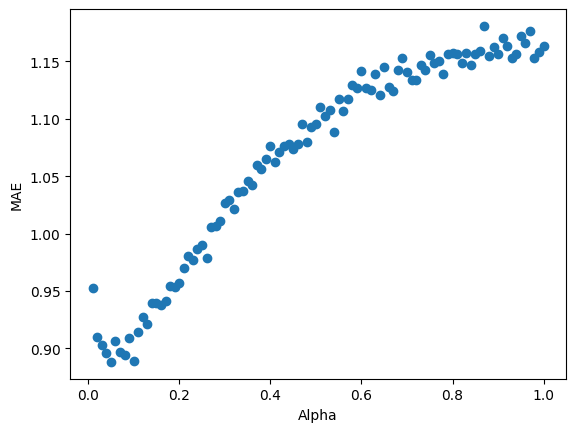

In [98]:
plt.scatter(x=alpha_screen.alphas, y= alpha_screen.mae_list)
plt.xlabel("Alpha")
plt.ylabel("MAE")

In [99]:
error_low = []
error_high = []
min_mae = np.inf
best_alpha = None
best_alpha_stdev = None
for index, row in alpha_screen.iterrows():
    cv =  ast.literal_eval(row["all_maes"])
    error_low.append(np.percentile(cv, 5))
    error_high.append(np.percentile(cv, 95))
    mean_mae = row["mae_list"]
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_alpha = row["alphas"]
        best_alpha_stdev = np.std(cv)


In [100]:
best_alpha

0.05

In [101]:
best_alpha_stdev

0.05248072814749666

In [102]:
min_mae

0.8882870405433876

In [103]:
best_alpha_plus_std = min_mae + best_alpha_stdev
best_alpha_plus_std

0.9407677686908842

In [104]:
chosen_alpha_df = alpha_screen[alpha_screen["mae_list"] < best_alpha_plus_std]
chosen_alpha_df = chosen_alpha_df[chosen_alpha_df["alphas"] > best_alpha]
chosen_alpha_df.sort_values(by="mae_list", inplace=True)
chosen_alpha = chosen_alpha_df["alphas"].iloc[0]
chosen_alpha

0.0999999999999999

In [105]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

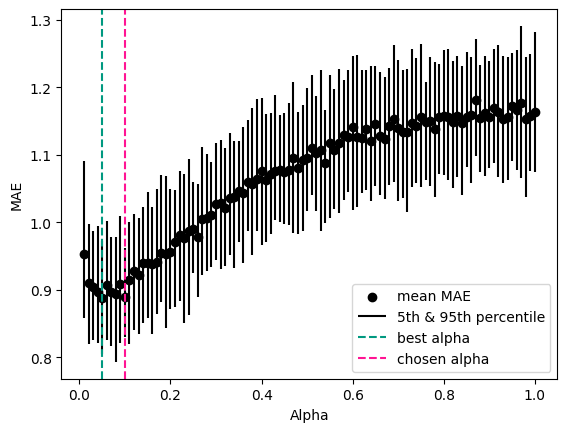

In [106]:
plt.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
plt.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
plt.axvline(x=best_alpha, color=light_green, linestyle='--', label = "best alpha")
plt.axvline(x=chosen_alpha, color=pink, linestyle='--', label = "chosen alpha")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.legend(loc="lower right")

In [107]:
mae_df = pd.read_csv("../../data/results_ave_mae_1.csv", index_col=0)
mae_df

,Gene,ave_MAE
0,lipe,1.017414
1,LOC106564730,1.024242
2,LOC106602690,1.023597
3,LOC106581127,1.022533
4,LOC106588400,0.999736
...,...,...
474,LOC106591957,1.025322
475,LOC106606691,0.991557
476,LOC106592031,1.021712
477,LOC106608968,1.009791


             Gene   ave_MAE
230  LOC106566372  0.964860
308           hba  0.964900
396  LOC106607380  0.965438
442          duox  0.969507
86   LOC106583594  0.974423


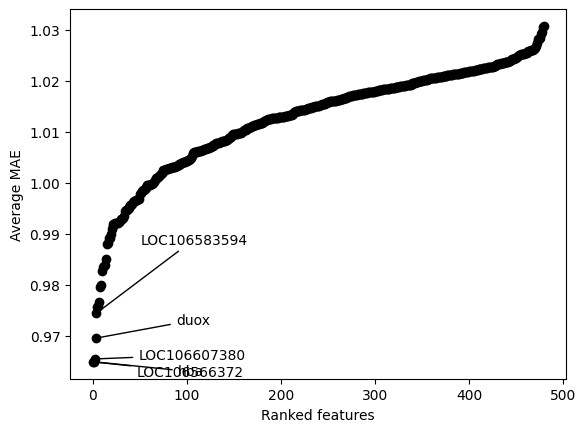

In [108]:
mae_df.sort_values(by="ave_MAE", inplace=True)

print(mae_df.head())

mae_list = list(mae_df["ave_MAE"])
feature_list = list(mae_df["Gene"])
x = np.linspace(0, len(mae_df), len(mae_df))
y = mae_list

plt.scatter(x, y, c='k')
plt.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(70,-10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(70,-10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(70,0), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(70,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(70,50), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.ylabel("Average MAE")
plt.xlabel("Ranked features")
plt.show()

Text(-0.18, 1.05, 'b)')

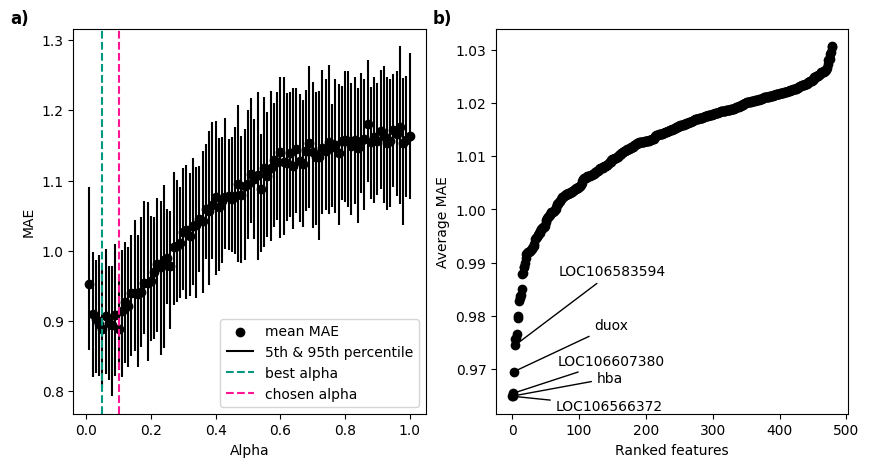

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

ax1.scatter(x=alpha_screen.alphas, 
            y= alpha_screen.mae_list,
            c='k',
            label="mean MAE")
ax1.vlines(alpha_screen.alphas, 
           error_low, 
           error_high,
           colors='k',
           label = "5th & 95th percentile")
ax1.axvline(x=best_alpha, color=light_green, linestyle='--', label = "best alpha")
ax1.axvline(x=chosen_alpha, color=pink, linestyle='--', label = "chosen alpha")
ax1.set_xlabel("Alpha")
ax1.set_ylabel("MAE")
ax1.legend(loc="lower right")

ax2.scatter(x, y, c='k')
ax2.annotate(feature_list[0], (x[0], y[0]), textcoords="offset points", xytext=(70,-10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[1], (x[1], y[1]), textcoords="offset points", xytext=(70,10), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[2], (x[2], y[2]), textcoords="offset points", xytext=(70,20), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[3], (x[3], y[3]), textcoords="offset points", xytext=(70,30), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
ax2.annotate(feature_list[4], (x[4], y[4]), textcoords="offset points", xytext=(70,50), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

ax2.set_ylabel("Average MAE")
ax2.set_xlabel("Ranked features")

ax1.text(-0.18, 1.05, 'a)', transform=ax1.transAxes, fontsize=12, fontweight='bold', va='top')
ax2.text(-0.18, 1.05, 'b)', transform=ax2.transAxes, fontsize=12, fontweight='bold', va='top')